In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target)

In [6]:
def setcolor(value):
    color = []
    colors = [ 'b', 'g', 'r' ]
    for i in value.values:
        color.append(colors[i])
    return color

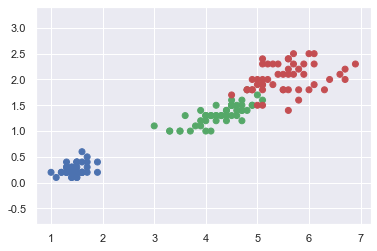

In [7]:
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'], 
            color = setcolor(df['species']))
plt.axis('equal')
plt.show()

In [9]:
from sklearn.preprocessing import minmax_scale

df['s_petal length (cm)'] = minmax_scale(df['petal length (cm)'])
df['s_petal width (cm)'] = minmax_scale(df['petal width (cm)'])


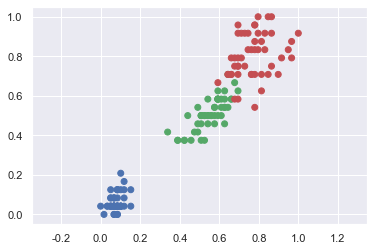

In [10]:
plt.axis('equal')
plt.scatter(x=df['s_petal length (cm)'], y=df['s_petal width (cm)'],
           color = setcolor(df['species']))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
column_train = ['petal length (cm)', 'petal width (cm)']
X_train, X_test, y_train, y_test = train_test_split(df[column_train], df['species'], test_size=0.33)

In [12]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
neigh5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
neigh5.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [15]:
pred = neigh5.predict(X_test)

In [16]:
print(pred)

[2 2 1 0 0 2 2 0 1 2 1 0 2 0 0 1 2 0 2 0 0 0 2 2 1 0 1 1 1 2 1 2 1 2 1 1 0
 1 0 0 2 1 1 2 0 1 0 2 0 1]


In [17]:
print(y_test.values)

[2 2 1 0 0 2 2 0 1 2 2 0 2 0 0 1 2 0 2 0 0 0 2 2 1 0 2 1 1 2 1 2 1 2 1 1 0
 1 0 0 2 1 1 2 0 1 0 2 0 1]


In [18]:
print(confusion_matrix(y_test, pred))

[[17  0  0]
 [ 0 15  0]
 [ 0  2 16]]


In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        18

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [1]:
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
X = np.array([[0,0], [1,1]])
y = [0,1]

In [8]:
model = LinearSVC()
model.fit(X, y)

LinearSVC()

In [9]:
model.predict([[0.7,0.6]])

array([1])

In [10]:
model.predict([[0.3,0.2]])

array([0])

In [11]:
print(model.coef_)
print(model.intercept_)

[[0.58822994 0.58822994]]
[-0.47057486]


In [12]:
from matplotlib import style
style.use('ggplot')

[0.58822994 0.58822994]


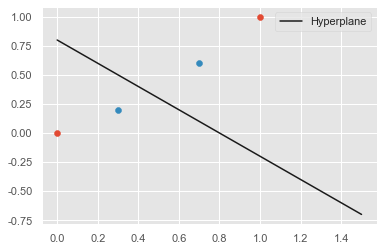

In [13]:
w = model.coef_[0]
print(w)
b =  model.intercept_[0]
slope = -w[0] / w[1] 
xx = np.linspace(0, 1.5)
yy =  slope * xx -b/w[1]
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter(X[:, 0], X[:,1])
plt.scatter([0.7, 0.3], [0.6, 0.2])
plt.legend()
plt.show()

### XOR

In [14]:
from sklearn.svm import SVC

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = [0, 1, 1, 0]

In [15]:
model = SVC()

In [16]:
model.fit(X, y)

SVC()

In [17]:
test_data = np.array([[0.8,0.8], [0.2, 0.9]])
model.predict(test_data)

array([0, 1])

In [18]:
data = pd.read_csv('weather_nomial.csv', sep=',')

In [19]:
data

,outlook,temperature,humidity,windy,play
0,rainy,hot,high,False,no
1,rainy,hot,high,True,no
2,overcast,hot,high,False,yes
3,sunny,mild,high,False,yes
4,sunny,cool,normal,False,yes
5,sunny,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,rainy,mild,high,False,no
8,rainy,cool,normal,False,yes
9,sunny,mild,normal,False,yes


In [20]:
# mapping dictionary 만들기
outlook_dic = {'overcast':0 , 'rainy': 1, 'sunny':2 }
temperature_dic = {'cool': 0, 'hot': 1, 'mild':2 }
humidity_dic = {'high':0 , 'normal':1 }
windy_dic = {False:0, True:1}


# 딕셔너리를 활용해 데이터 매핑
data['outlook'] = data['outlook'].map(outlook_dic) 
data['temperature'] = data['temperature'].map(temperature_dic)
data['humidity'] = data['humidity'].map(humidity_dic)
data['windy'] = data['windy'].map(windy_dic)

In [21]:
data

,outlook,temperature,humidity,windy,play
0,1,1,0,0,no
1,1,1,0,1,no
2,0,1,0,0,yes
3,2,2,0,0,yes
4,2,0,1,0,yes
5,2,0,1,1,no
6,0,0,1,1,yes
7,1,2,0,0,no
8,1,0,1,0,yes
9,2,2,1,0,yes


In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [23]:
model.fit(data.iloc[:,:4], data['play'])

MultinomialNB()

In [24]:
model.predict([[2,2,0,1]])

array(['no'], dtype='<U3')

In [25]:
model.predict_proba([[2,2,0,1]])

array([[0.55477945, 0.44522055]])

In [26]:
model.predict([[1,2,0,1]])

array(['yes'], dtype='<U3')

In [27]:
model.predict_proba([[1,2,0,1]])

array([[0.48708265, 0.51291735]])

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [29]:
clf.fit(data.iloc[:,:4], data['play'])

DecisionTreeClassifier()

In [30]:
clf.predict([[2,2,0,1]])

array(['no'], dtype=object)

In [31]:
clf.predict([[1,2,0,1]])

array(['no'], dtype=object)

In [32]:
clf.predict_proba([[1,2,0,1]])

array([[1., 0.]])

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [35]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [36]:
import warnings
warnings.filterwarnings('ignore')

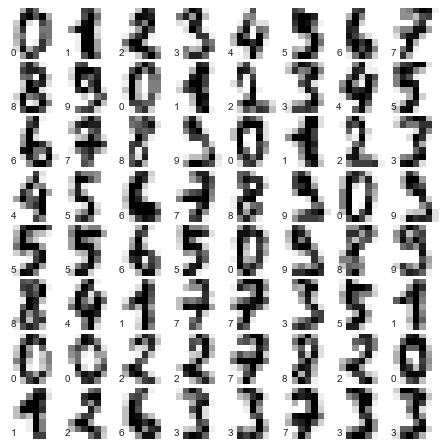

In [45]:
#그림 설정
fig = plt.figure( figsize=(6,6)) # 그림 크기의 단위는 인치
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 숫자 출력
for i in range(64):
    ax = fig.add_subplot( 8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary, interpolation='nearest')
    # 이미지에 레이블 추가
    ax.text(0,7, str(digits.target[i]))

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digits.data)
X_data = scaler.transform(digits.data)

In [47]:
print(X_data[0], len(X_data[0]))

[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752] 64


In [ ]:

rng = np.random.RandomState(42)
x = 10*rng.rand(200)


In [ ]:

model = RandomForestClassifier(n_estimators= )
model.fit(Xtrain, ytrain)
ypred = model.predict( )

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X_data,digits.target,
                                random_state=0 )


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [50]:
log_clf = LogisticRegression(fit_intercept=True)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
nb_clf = GaussianNB()
rndf_clf = RandomForestClassifier()
svm_clf = SVC()



In [51]:
voting_clf = VotingClassifier(
              estimators=[('lr', log_clf),
                         ('nb', nb_clf),
                         ('knn', knn_clf)],
              voting='hard')
voting_clf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(weights='distance'))])

In [53]:
# 정확도 확인
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, nb_clf, voting_clf, 
           rndf_clf, svm_clf) :
    clf.fit(Xtrain, ytrain )
    pred = clf.predict(Xtest)
    print(clf.__class__.__name__, accuracy_score(ytest, pred) )

LogisticRegression 0.9666666666666667
KNeighborsClassifier 0.9733333333333334
GaussianNB 0.7777777777777778
VotingClassifier 0.9733333333333334
RandomForestClassifier 0.9711111111111111
SVC 0.9844444444444445
